In [20]:
from sklearnex.linear_model import LinearRegression
from sklearnex.ensemble import RandomForestClassifier
from sklearnex.linear_model import LogisticRegression

In [61]:
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
import matplotlib.pyplot as plt

import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("crop yield.csv")

data.head(38)

,DISTRICT,Crops,Area,Production,fertiliser,cost of cultivation,Duration,expected revenues
0,Ariyalur,Mango,1254.00,2000.00,urea,Rs.60000,6 months,120000.0
1,Chengalpattu,sugarcane,2.00,1.00,potassium,Rs.70500,7 months,720000.0
2,Chennai,onion,102.00,321.00,Fast Release Nitrogen,Rs.70501,8 months,190000.0
3,Coimbatore,millet,176.00,641.00,Slow Release Nitrogen,Rs.70502,9 months,185000.0
4,Cuddalore,turmeric,720.00,165.00,Controlled Release,Rs.70503,10 months,180000.0
5,Dharmapuri,Tomato,18168.00,65100000.00,urea,Rs.70504,11 months,150000.0
6,Dindigul,sapota,36.00,100.00,Ammonium Sulfate (NH4)2SO4,Rs.70505,12 months,130000.0
7,Erode,Banana,1.00,2.00,Calcium cyanamide CaCN2,Rs.70506,13 months,179000.0
8,Kallakkurichi,Maize,5.00,15.00,Calcium nitrate Ca(NO3)2,Rs.70507,14 months,120000.0
9,Kancheepuram,Watermelon,40.00,169.00,Sodium nitrate NaNO3,Rs.70508,15 months,186000.0


In [102]:

crop_pred = data['Crops']
crop_input = data.drop('Crops', axis =1)
crop_pred.head()
     

0        Mango
1    sugarcane
2        onion
3       millet
4     turmeric
Name: Crops, dtype: object

In [103]:
crop_input.head()

,DISTRICT,Area,Production,fertiliser,cost of cultivation,Duration,expected revenues
0,Ariyalur,1254.0,2000.0,urea,Rs.60000,6 months,120000.0
1,Chengalpattu,2.0,1.0,potassium,Rs.70500,7 months,720000.0
2,Chennai,102.0,321.0,Fast Release Nitrogen,Rs.70501,8 months,190000.0
3,Coimbatore,176.0,641.0,Slow Release Nitrogen,Rs.70502,9 months,185000.0
4,Cuddalore,720.0,165.0,Controlled Release,Rs.70503,10 months,180000.0


In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical = ['Production','Area','expected revenues']
crop_transformed = pd.DataFrame(data =crop_input)

In [41]:
features_final = pd.get_dummies(crop_transformed)
crop_transformed.head()

,DISTRICT,Area,Production,fertiliser,cost of cultivation,Duration,expected revenues
0,Ariyalur,1254.0,2000.0,urea,Rs.60000,6 months,120000.0
1,Chengalpattu,2.0,1.0,potassium,Rs.70500,7 months,720000.0
2,Chennai,102.0,321.0,Fast Release Nitrogen,Rs.70501,8 months,190000.0
3,Coimbatore,176.0,641.0,Slow Release Nitrogen,Rs.70502,9 months,185000.0
4,Cuddalore,720.0,165.0,Controlled Release,Rs.70503,10 months,180000.0


In [42]:
data.describe()

,Area,Production,expected revenues
count,38.000000,3.800000e+01,38.000000
mean,2213.102105,6.989858e+06,156896.578947
std,5580.507063,2.065858e+07,107480.501721
min,1.000000,3.000000e-01,120000.000000
25%,41.500000,3.475000e+01,120000.000000
50%,102.000000,1.670000e+02,120000.000000
75%,719.750000,1.118750e+03,145000.000000
max,18284.740000,6.858000e+07,720000.000000


In [43]:
data.isnull().values.any()

True

In [44]:
features_final.head()

,Area,Production,expected revenues,DISTRICT_Ariyalur,DISTRICT_Chengalpattu,DISTRICT_Chennai,DISTRICT_Coimbatore,DISTRICT_Cuddalore,DISTRICT_Dharmapuri,DISTRICT_Dindigul,...,Duration_38 months,Duration_39 months,Duration_40 months,Duration_41 months,Duration_42 months,Duration_43 months,Duration_6 months,Duration_7 months,Duration_8 months,Duration_9 months
0,1254.0,2000.0,120000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2.0,1.0,720000.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,102.0,321.0,190000.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,176.0,641.0,185000.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,720.0,165.0,180000.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
factor = pd.factorize(data['Crops'])
data.Crop = factor[0]
definitions = factor[1]
print(data.Crops.head())
print(definitions)

0        Mango
1    sugarcane
2        onion
3       millet
4     turmeric
Name: Crops, dtype: object
Index(['Mango', 'sugarcane', 'onion', 'millet', 'turmeric', 'Tomato', 'sapota',
       'Banana', 'Maize', 'Watermelon', 'paddy', 'cocount', 'ragi', 'cotton',
       'tapioca', 'Jackfruits', 'carrot', 'eggplant', 'brinjal', 'coriander',
       'okra', 'coffee', 'black gram', 'guava', 'peanuts', 'cocoa', 'cabbage',
       'chilies', 'acidic lime', 'ginger', 'red gram', 'papaya', 'muskmelon',
       'green', 'jasmine', 'cashew', 'amla', 'peppers'],
      dtype='object')


/tmp/ipykernel_2614277/1865958356.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.Crop = factor[0]


In [46]:

X =features_final.iloc[:].values
y = data.iloc[:,6].values
print('The independent features set: ')
print(X[:5,:])
print('The dependent variable: ')
print(y[:5])
     

The independent features set: 
[[1254.0 2000.0 120000.0 True False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False True False False False False True
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False True False False False]
 [2.0 1.0 720000.0 False True False False False False False False False
  False False False False False False False False False False False False
  False False False

In [52]:
crop_data = data.dropna()
crop_data

,DISTRICT,Crops,Area,Production,fertiliser,cost of cultivation,Duration,expected revenues
0,Ariyalur,Mango,1254.00,2000.00,urea,Rs.60000,6 months,120000.0
1,Chengalpattu,sugarcane,2.00,1.00,potassium,Rs.70500,7 months,720000.0
2,Chennai,onion,102.00,321.00,Fast Release Nitrogen,Rs.70501,8 months,190000.0
3,Coimbatore,millet,176.00,641.00,Slow Release Nitrogen,Rs.70502,9 months,185000.0
4,Cuddalore,turmeric,720.00,165.00,Controlled Release,Rs.70503,10 months,180000.0
5,Dharmapuri,Tomato,18168.00,65100000.00,urea,Rs.70504,11 months,150000.0
6,Dindigul,sapota,36.00,100.00,Ammonium Sulfate (NH4)2SO4,Rs.70505,12 months,130000.0
7,Erode,Banana,1.00,2.00,Calcium cyanamide CaCN2,Rs.70506,13 months,179000.0
8,Kallakkurichi,Maize,5.00,15.00,Calcium nitrate Ca(NO3)2,Rs.70507,14 months,120000.0
9,Kancheepuram,Watermelon,40.00,169.00,Sodium nitrate NaNO3,Rs.70508,15 months,186000.0


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state= 21 )


print("Training set has {} samples.".format(X_train.shape[0]))

print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 33 samples.
Testing set has 6 samples.


In [53]:
crop_data['crop yield'] = (data['Production'] / crop_data['Area'])
crop_data.head(10) 

/tmp/ipykernel_2614277/2130836109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['crop yield'] = (data['Production'] / crop_data['Area'])


,DISTRICT,Crops,Area,Production,fertiliser,cost of cultivation,Duration,expected revenues,crop yield
0,Ariyalur,Mango,1254.0,2000.0,urea,Rs.60000,6 months,120000.0,1.594896
1,Chengalpattu,sugarcane,2.0,1.0,potassium,Rs.70500,7 months,720000.0,0.500000
2,Chennai,onion,102.0,321.0,Fast Release Nitrogen,Rs.70501,8 months,190000.0,3.147059
3,Coimbatore,millet,176.0,641.0,Slow Release Nitrogen,Rs.70502,9 months,185000.0,3.642045
4,Cuddalore,turmeric,720.0,165.0,Controlled Release,Rs.70503,10 months,180000.0,0.229167
5,Dharmapuri,Tomato,18168.0,65100000.0,urea,Rs.70504,11 months,150000.0,3583.223250
6,Dindigul,sapota,36.0,100.0,Ammonium Sulfate (NH4)2SO4,Rs.70505,12 months,130000.0,2.777778
7,Erode,Banana,1.0,2.0,Calcium cyanamide CaCN2,Rs.70506,13 months,179000.0,2.000000
8,Kallakkurichi,Maize,5.0,15.0,Calcium nitrate Ca(NO3)2,Rs.70507,14 months,120000.0,3.000000
9,Kancheepuram,Watermelon,40.0,169.0,Sodium nitrate NaNO3,Rs.70508,15 months,186000.0,4.225000


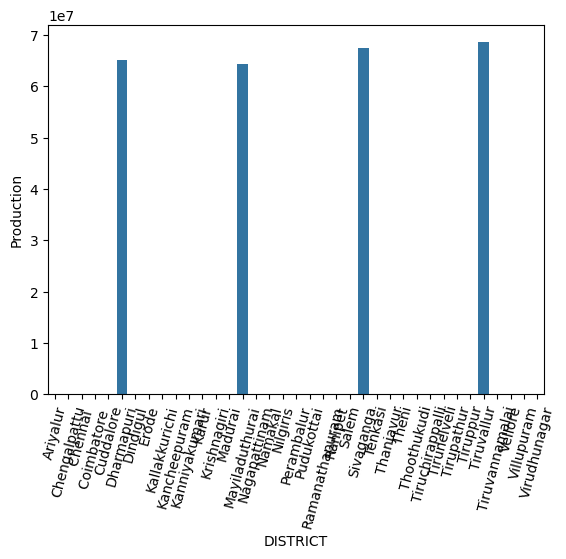

In [73]:
sns.barplot(x=data["DISTRICT"], y=data["Production"])
plt.xticks(rotation=75)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, '6 months'),
  Text(0, 1, '7 months'),
  Text(0, 2, '8 months'),
  Text(0, 3, '9 months'),
  Text(0, 4, '10 months'),
  Text(0, 5, '11 months'),
  Text(0, 6, '12 months'),
  Text(0, 7, '13 months'),
  Text(0, 8, '14 months'),
  Text(0, 9, '15 months'),
  Text(0, 10, '16 months'),
  Text(0, 11, '17 months'),
  Text(0, 12, '18 months'),
  Text(0, 13, '19 months'),
  Text(0, 14, '20 months'),
  Text(0, 15, '21 months'),
  Text(0, 16, '22 months'),
  Text(0, 17, '23 months'),
  Text(0, 18, '24 months'),
  Text(0, 19, '25 months'),
  Text(0, 20, '26 months'),
  Text(0, 21, '27 months'),
  Text(0, 22, '28 months'),
  Text(0, 23, '29 months'),
  Text(0, 24, '30 months'),
  Text(0, 25, '31 months'),
  Text(0, 26, '32 months'),
  Text(0, 27, '33 months'),
  Text(0, 2

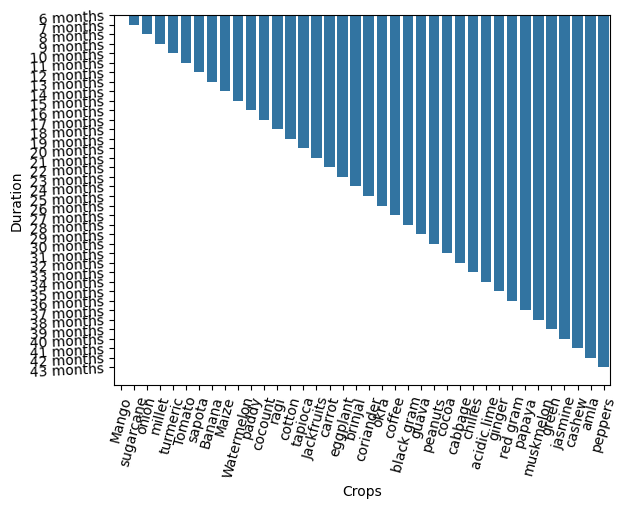

In [84]:
sns.barplot(y=data["Duration"], x=data["Crops"])
plt.xticks(rotation = 75)
plt.yticks(rotation = 3)

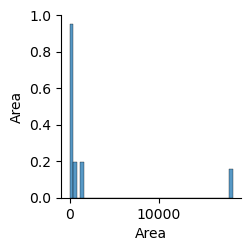

In [91]:
x = "DISTRICT"
y = "Area"

sns.pairplot(data[[x, y]])
plt.show()


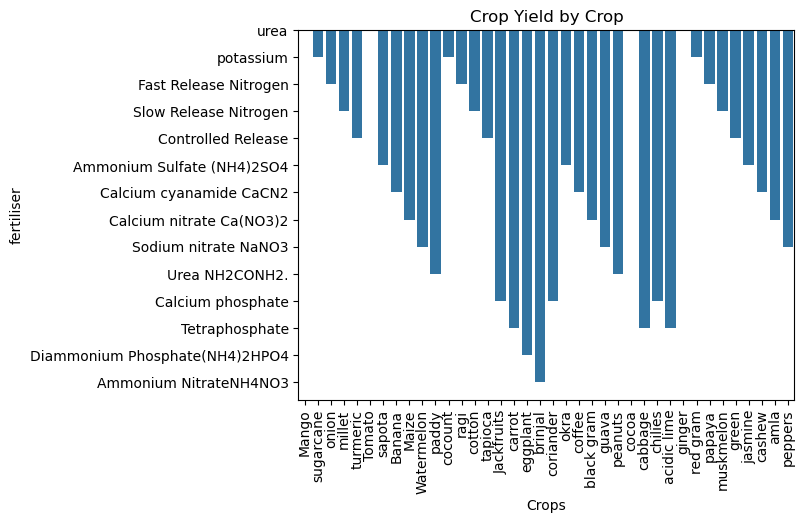

In [100]:
sns.barplot(x='Crops', y='fertiliser', data= data)
plt.xticks(rotation=90)
plt.title('Crop Yield by fertiliser')
plt.show()

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you can use X_train and y_train to fit your classifier


In [21]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(classifier, 'crop_yield.pkl') 

['crop_yield.pkl']